# prepare the data for the frequency and severity model

In [31]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [32]:
df=pd.read_csv('./freMTPL2freq.csv')
df1=pd.read_csv('./freMTPL2sev.csv')
print(df.shape)
print(df1.shape)

(676136, 13)
(26639, 2)


In [33]:
df.drop_duplicates(subset='IDpol',keep='first',inplace=True)
print(df.shape)

(676136, 13)


In [34]:
df1=pd.DataFrame(df1.groupby(by='IDpol').agg({'ClaimAmount':'sum'})).reset_index()
df1.drop_duplicates(subset='IDpol',keep='first',inplace=True)
print(df1.shape)

(24950, 2)


In [35]:
df=pd.merge(df,df1,on='IDpol',how='left')

df.rename(columns={'ClaimAmount':'payout'},inplace=True)

In [36]:
df.payout=df.payout.fillna(0)

In [37]:
df.groupby(by='ClaimNb').agg({'payout':'mean'})

,payout
ClaimNb,
0,0.000000
1,1611.637025
2,4300.151612
3,9334.809878
4,6295.680000
5,17795.050000
6,9653.600000
8,24825.770000
9,18354.660000


In [38]:
# d1=df.loc[((df.ClaimNb.isin([1,2,3,4]))&(df.payout==0)),:]
# d2=df.loc[~((df.ClaimNb.isin([1,2,3,4]))&(df.payout==0)),:]
# d1.payout=np.random.randint(1000,5000,8781)
# df=pd.concat([d1,d2])
# print(df.shape)

In [39]:
df['Actual_premium']=np.random.randint(100,275,676136)
# df['Actual_premium']=np.random.randint(1000,5000,676136)
print(df.shape)

(676136, 15)


In [40]:
df.Date=pd.to_datetime(df.Date,format='%d-%m-%Y')
df.sort_values(by='Date',inplace=True)
df['YM']=pd.to_datetime(df.Date).dt.to_period('M')

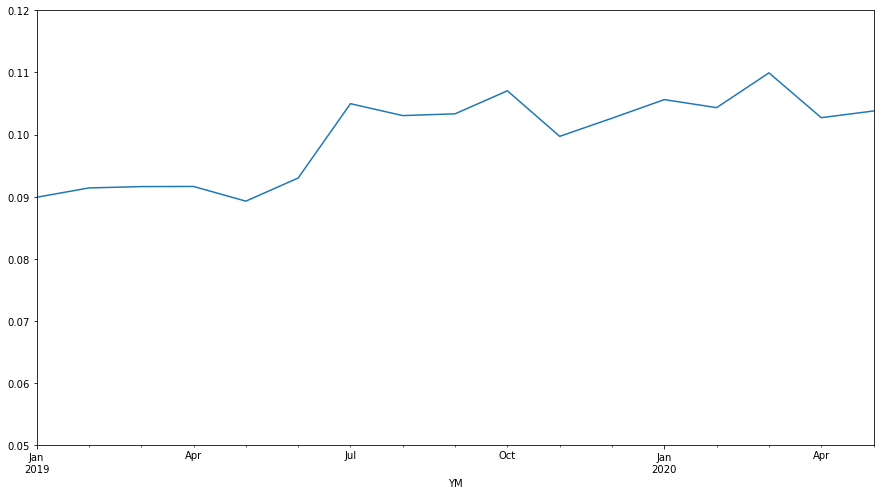

In [41]:
test=pd.DataFrame(df.groupby(by=['YM']).agg({'ClaimNb':'sum','Exposure':'sum'}))
test['Frequency'] = test['ClaimNb'] / test['Exposure']
plt.figure(figsize=(15,8))
plt.ylim(0.05,.12)
test['Frequency'].plot()

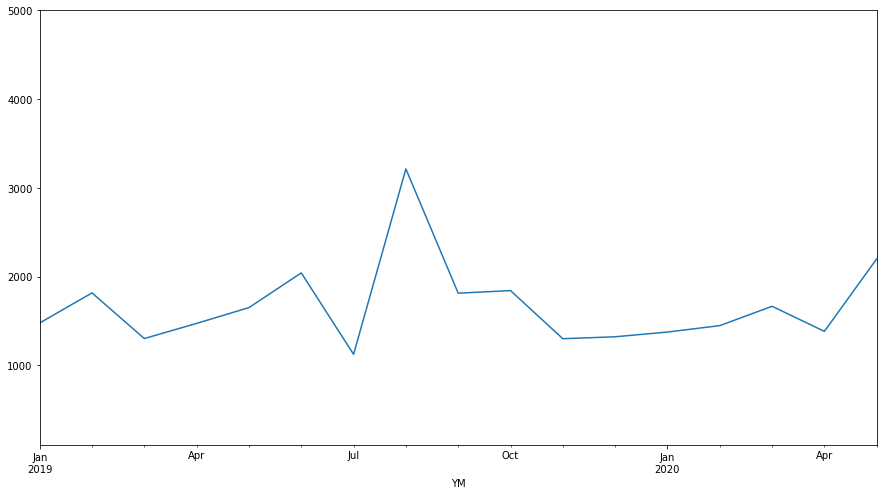

In [42]:
test=pd.DataFrame(df.groupby(by=['YM']).agg({'ClaimNb':'sum','payout':'sum'}))
test['sev'] = test['payout'] / test['ClaimNb']
plt.figure(figsize=(15,8))
plt.ylim(100,5000)
test['sev'].plot()

In [43]:
from sklearn.model_selection import train_test_split
# Split training into train and test
df1, df2 = train_test_split(df, test_size=0.15, random_state=34, shuffle=True)
print("Train sample size: " + str(df1.shape))
print("Hold sample size: " + str(df2.shape))

df2.to_csv('holdout_data.csv',index=False)

df=df1.copy()
del df1

# Split training into train and test
df1, df2 = train_test_split(df, test_size=0.15, random_state=34, shuffle=True)
print("test sample size: " + str(df2.shape))
print("Train sample size: " + str(df1.shape))

df1.to_csv('train_data.csv',index=False)
df2.to_csv('test_data.csv',index=False)

Train sample size: (574715, 16)
Hold sample size: (101421, 16)
test sample size: (86208, 16)
Train sample size: (488507, 16)
